In [138]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
RSEED=50

In [139]:
#import data set
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [140]:
#.shape to find rows, columns
df.shape

(11162, 17)

In [141]:
#.isna()        to find null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [142]:
#.describe() to find statistical information
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [143]:
#label encoding all no=0 , yes=1
cleanup = {'contact': {'no':0 , 'yes':1},
           'default': {'no':0 , 'yes':1},
           'housing' : {'no':0 , 'yes':1}, 
           'loan' : {'no':0 , 'yes':1},
          'deposit' : {'no':0 , 'yes':1}}

In [144]:
#replacing categorical to numerical
df.replace(cleanup,inplace=True)

In [145]:
#.head()   to get 1st 5 row,column
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [146]:
# Convert categorical variables to dummies
df = pd.get_dummies(data=df, columns = ['job', 'marital','education' ,'poutcome'], \
                                   prefix = ['job', 'marital', 'education' , 'poutcome'])
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,unknown,5,may,1042,1,...,1,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,unknown,5,may,1467,1,...,1,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,unknown,5,may,1389,1,...,1,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,unknown,5,may,579,1,...,1,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,unknown,5,may,673,2,...,1,0,0,0,1,0,0,0,0,1


In [147]:
df.shape

(11162, 36)

In [148]:
df=df.drop(['contact'],axis=1)  #drop no impacting column

In [149]:
df=df.drop(['month'],axis=1)    #drop no impacting column

In [150]:
Y = np.array (df['deposit'])   #convert dependent variable to numpy array

In [151]:
df=df.drop(['deposit'],axis=1)   #drop dependent variable

In [152]:
feature_list=list(df.columns)

In [153]:
df=np.array(df)

In [154]:
df

array([[  59,    0, 2343, ...,    0,    0,    1],
       [  56,    0,   45, ...,    0,    0,    1],
       [  41,    0, 1270, ...,    0,    0,    1],
       ...,
       [  32,    0,   29, ...,    0,    0,    1],
       [  43,    0,    0, ...,    0,    0,    0],
       [  34,    0,    0, ...,    0,    0,    1]], dtype=int64)

In [155]:
df2=df.copy()     #.copy()  to get copied data
df2

array([[  59,    0, 2343, ...,    0,    0,    1],
       [  56,    0,   45, ...,    0,    0,    1],
       [  41,    0, 1270, ...,    0,    0,    1],
       ...,
       [  32,    0,   29, ...,    0,    0,    1],
       [  43,    0,    0, ...,    0,    0,    0],
       [  34,    0,    0, ...,    0,    0,    1]], dtype=int64)

In [157]:
# train test split
train_df ,test_df , train_Y ,test_Y = train_test_split (df ,Y ,stratify = Y , test_size=0.3 , random_state=RSEED) 

In [158]:
  #lets look at shape of each

In [159]:
train_df.shape

(7813, 33)

In [160]:
test_df.shape

(3349, 33)

In [161]:
train_Y.shape

(7813,)

In [162]:
test_Y.shape

(3349,)

In [163]:
from sklearn.ensemble import RandomForestClassifier


In [164]:
#initiate model with 1000 decison trrees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


In [165]:
# Train model
model.fit(train_df, train_Y)
#print(f'Decision tree has {model.model_.node_count} nodes with maximum depth {model.model_.max_depth}.')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [166]:
# Make probability predictions
model_probs = model.predict_proba(train_df)[:, 1]
probs = model.predict_proba(test_df)[:, 1]

model_predictions = model.predict(train_df)
predictions = model.predict(test_df)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [167]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_Y, model_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_Y, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8878959079410104


In [168]:
#baseline guess
print(f'Baseline ROC AUC: {roc_auc_score(test_Y, [1 for _ in range(len(test_Y))])}')

Baseline ROC AUC: 0.5


In [169]:
#Our model does outperform a baseline guess

In [170]:
def evaluate_model(predictions, probs, model_predictions, model_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_Y, [1 for _ in range(len(test_Y))])
    baseline['precision'] = precision_score(test_Y, [1 for _ in range(len(test_Y))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_Y, predictions)
    results['precision'] = precision_score(test_Y, predictions)
    results['roc'] = roc_auc_score(test_Y, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_Y, model_predictions)
    train_results['precision'] = precision_score(train_Y, model_predictions)
    train_results['roc'] = roc_auc_score(train_Y, model_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_Y, [1 for _ in range(len(test_Y))])
    model_fpr, model_tpr, _ = roc_curve(test_Y, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


Recall Baseline: 1.0 Test: 0.83 Train: 1.0
Precision Baseline: 0.47 Test: 0.8 Train: 1.0
Roc Baseline: 0.5 Test: 0.89 Train: 1.0


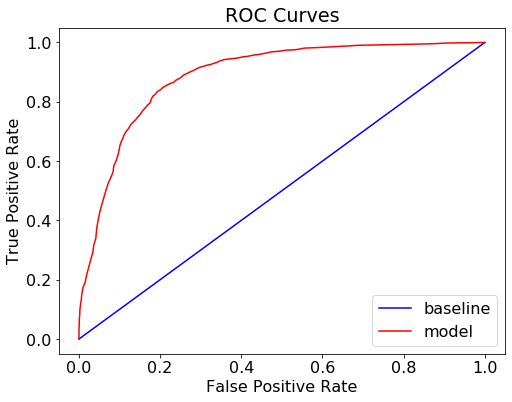

In [171]:
evaluate_model(predictions, probs, model_predictions, model_probs)

In [185]:
rf=RandomForestClassifier()

In [187]:
rf.fit(train_df , train_Y)

C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
Y_pred = rf.predict(test_df)

In [192]:
df5=pd.DataFrame({'actual' : test_Y , 'predicted' : Y_pred})
df5


,actual,predicted
0,1,1
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
3344,1,1
3345,0,0
3346,1,1
3347,0,0


In [193]:
#confusion matrix import
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(test_Y , Y_pred)
confusion_matrix



array([[1454,  308],
       [ 363, 1224]], dtype=int64)

In [194]:
#to obtain mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score


In [195]:
print("mean squarerrd error :" ,mean_squared_error(test_Y , Y_pred) )

mean squarerrd error : 0.20035831591519856


In [197]:
print("r2 error :" , r2_score(test_Y , Y_pred) )

r2 error : 0.1963724129150941


In [200]:
print("accuracy of rf model in percentage :" , rf.score(test_df, test_Y))

accuracy of rf model in percentage : 0.7996416840848014


In [ ]:
###Feature Importances

#Finally, we can take a look at the features considered most important by the Decision Tree. The values are computed by summing the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used. 

In [175]:
fi_model = pd.DataFrame({'feature': feature_list,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
6,duration,0.354812
2,balance,0.108345
0,age,0.104030
5,day,0.088978
7,campaign,0.043860
8,pdays,0.041268
31,poutcome_success,0.035710
3,housing,0.032994
9,previous,0.024585
4,loan,0.012305
